In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
data_train = pd.read_csv('air_pollution_train.csv')
data_train.head(5)

,Unnamed: 0,var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var2(t)
0,1,129.0,-16.0,-4.0,1020.0,SE,1.79,0.0,0.0,148.0
1,2,148.0,-15.0,-4.0,1020.0,SE,2.68,0.0,0.0,159.0
2,3,159.0,-11.0,-5.0,1021.0,SE,3.57,0.0,0.0,181.0
3,4,181.0,-7.0,-5.0,1022.0,SE,5.36,1.0,0.0,138.0
4,5,138.0,-7.0,-5.0,1022.0,SE,6.25,2.0,0.0,109.0


In [3]:
data_train.drop('Unnamed: 0', axis=1, inplace=True)
data_train.head(5)

,var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var2(t)
0,129.0,-16.0,-4.0,1020.0,SE,1.79,0.0,0.0,148.0
1,148.0,-15.0,-4.0,1020.0,SE,2.68,0.0,0.0,159.0
2,159.0,-11.0,-5.0,1021.0,SE,3.57,0.0,0.0,181.0
3,181.0,-7.0,-5.0,1022.0,SE,5.36,1.0,0.0,138.0
4,138.0,-7.0,-5.0,1022.0,SE,6.25,2.0,0.0,109.0


In [4]:
label_encoder = LabelEncoder()
data_train.iloc[:,4] = label_encoder.fit_transform(data_train.iloc[:,4])

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
data_train_framed = scaler.fit_transform(data_train)

In [6]:
def series_to_supervised(data, input_lag=1, out_lag=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    for i in range(input_lag, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    for i in range(0, out_lag):
        cols.append(df.shift(-i))
        if (i == 0):
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    
    new_df = pd.concat(cols, axis=1)
    new_df.columns = names
    
    if (dropnan):
        new_df.dropna(inplace=True)
    
    return new_df

# Lag = 1

In [7]:
data_train_framed = series_to_supervised(data=data_train_framed)

In [8]:
data_train_framed.head(5)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t)
1,0.129779,0.278689,0.250000,0.527273,0.666667,0.002290,0.000000,0.0,0.148893,0.148893,0.295082,0.250000,0.527273,0.666667,0.003811,0.000000,0.0,0.159960
2,0.148893,0.295082,0.250000,0.527273,0.666667,0.003811,0.000000,0.0,0.159960,0.159960,0.360656,0.233333,0.545455,0.666667,0.005332,0.000000,0.0,0.182093
3,0.159960,0.360656,0.233333,0.545455,0.666667,0.005332,0.000000,0.0,0.182093,0.182093,0.426230,0.233333,0.563636,0.666667,0.008391,0.037037,0.0,0.138833
4,0.182093,0.426230,0.233333,0.563636,0.666667,0.008391,0.037037,0.0,0.138833,0.138833,0.426230,0.233333,0.563636,0.666667,0.009912,0.074074,0.0,0.109658
5,0.138833,0.426230,0.233333,0.563636,0.666667,0.009912,0.074074,0.0,0.109658,0.109658,0.426230,0.216667,0.563636,0.666667,0.011433,0.111111,0.0,0.105634


In [9]:
len(data_train_framed.columns)

18

In [10]:
data_train_framed.drop(data_train_framed.columns[[9, 10, 11, 12, 13, 14, 15, 16, 17]], axis=1, inplace=True)
data_train_framed.head(5)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1)
1,0.129779,0.278689,0.250000,0.527273,0.666667,0.002290,0.000000,0.0,0.148893
2,0.148893,0.295082,0.250000,0.527273,0.666667,0.003811,0.000000,0.0,0.159960
3,0.159960,0.360656,0.233333,0.545455,0.666667,0.005332,0.000000,0.0,0.182093
4,0.182093,0.426230,0.233333,0.563636,0.666667,0.008391,0.037037,0.0,0.138833
5,0.138833,0.426230,0.233333,0.563636,0.666667,0.009912,0.074074,0.0,0.109658


In [11]:
x = data_train_framed.loc[:,[
    'var1(t-1)',
    'var2(t-1)',
    'var3(t-1)',
    'var4(t-1)',
    'var5(t-1)',
    'var6(t-1)',
    'var7(t-1)',
    'var8(t-1)'
]]

y = data_train_framed.loc[:,['var9(t-1)']]

In [12]:
data_test = pd.read_csv('air_pollution_test.csv')
data_test.head(5)

,Unnamed: 0,var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var2(t)
0,35040,23.0,-20.0,7.0,1014.0,NW,137.67,0.0,0.0,24.0
1,35041,24.0,-20.0,7.0,1014.0,NW,143.48,0.0,0.0,53.0
2,35042,53.0,-20.0,7.0,1013.0,NW,147.50,0.0,0.0,65.0
3,35043,65.0,-20.0,6.0,1013.0,NW,151.52,0.0,0.0,70.0
4,35044,70.0,-20.0,6.0,1013.0,NW,153.31,0.0,0.0,79.0


In [13]:
data_test.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
data_test.iloc[:,4] = label_encoder.fit_transform(data_test.iloc[:,4])

In [15]:
data_test = scaler.fit_transform(data_test)
data_test = series_to_supervised(data=data_test)

In [16]:
data_test.drop(data_test.columns[[9, 10, 11, 12, 13, 14, 15, 16, 17]], axis=1, inplace=True)
data_test.head(5)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1)
1,0.034277,0.307692,0.363636,0.456522,0.333333,0.311347,0.0,0.0,0.035768
2,0.035768,0.307692,0.363636,0.456522,0.333333,0.324530,0.0,0.0,0.078987
3,0.078987,0.307692,0.363636,0.434783,0.333333,0.333651,0.0,0.0,0.096870
4,0.096870,0.307692,0.345455,0.434783,0.333333,0.342772,0.0,0.0,0.104322
5,0.104322,0.307692,0.345455,0.434783,0.333333,0.346834,0.0,0.0,0.117735


In [17]:
x_validation = data_test.loc[:,[
    'var1(t-1)',
    'var2(t-1)',
    'var3(t-1)',
    'var4(t-1)',
    'var5(t-1)',
    'var6(t-1)',
    'var7(t-1)',
    'var8(t-1)'
]]

y_validation = data_test.loc[:,['var9(t-1)']]

In [18]:
x_validation = np.expand_dims(x_validation, axis=2)

In [19]:
def split_data(x, y, train_size):
    x_train = x[:int(len(x)*train_size)]
    x_test = x[int(len(x)*train_size):]
    y_train = y[:int(len(y)*train_size)]
    y_test = y[int(len(y)*train_size):]
    
    return x_train, x_test, y_train, y_test

In [20]:
x_train, x_test, y_train, y_test = split_data(x, y, train_size=0.8)

In [21]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(28030, 8) (7008, 8) (28030, 1) (7008, 1)


In [22]:
model = Sequential()

model.add(Conv1D(filters=10, kernel_size=2, activation='relu', input_shape=(8, 1)))
model.add(Conv1D(filters=10, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

W0704 04:48:13.911961 139977024956224 deprecation_wrapper.py:119] From /home/lucas/LICA/LICA/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0704 04:48:13.935664 139977024956224 deprecation_wrapper.py:119] From /home/lucas/LICA/LICA/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0704 04:48:13.939012 139977024956224 deprecation_wrapper.py:119] From /home/lucas/LICA/LICA/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0704 04:48:14.128702 139977024956224 deprecation_wrapper.py:119] From /home/lucas/LICA/LICA/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [23]:
model.compile(optimizer='adam', loss='mse')

W0704 04:48:20.874540 139977024956224 deprecation_wrapper.py:119] From /home/lucas/LICA/LICA/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



# Test and validation with 100 epochs

In [24]:
x = np.expand_dims(x, axis=2)

In [25]:
print(x.shape)

(35038, 8, 1)


In [26]:
x_test = np.expand_dims(x_test, axis=2)
print(x_test.shape)

(7008, 8, 1)


In [27]:
model.fit(x, y, epochs=100, verbose=0)

W0704 04:49:01.558701 139977024956224 deprecation_wrapper.py:119] From /home/lucas/LICA/LICA/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0704 04:49:01.693100 139977024956224 deprecation_wrapper.py:119] From /home/lucas/LICA/LICA/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



In [28]:
prediction = model.predict(x_test)

In [29]:
print(np.sqrt(mean_squared_error(y_test, pred)).round(5))

0.02309


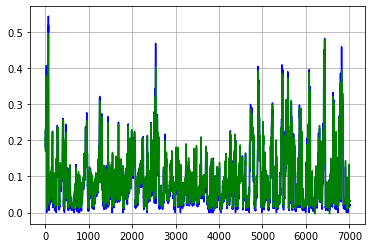

In [30]:
plt.plot(y_test.reset_index(drop=True), 'b')
plt.plot(prediction, 'g')
plt.grid(True)

In [32]:
print(x_validation.shape, y_validation.shape)

(8759, 8, 1) (8759, 1)


In [33]:
validation = model.predict(x_validation)

In [34]:
print(np.sqrt(mean_squared_error(y_validation, validation)).round(5))

0.03923


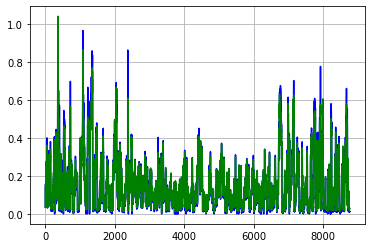

In [36]:
plt.plot(y_validation, 'b')
plt.plot(validation, 'g')
plt.grid(True)

# Test/validation with 500 epochs

In [37]:
model.fit(x, y, epochs=500, verbose=0)

In [38]:
prediction = model.predict(x_test)

In [40]:
print(np.sqrt(mean_squared_error(y_test, prediction)).round(5))

0.02191


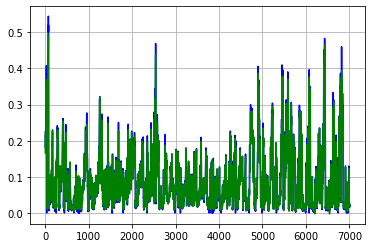

In [41]:
plt.plot(y_test.reset_index(drop=True), 'b')
plt.plot(prediction, 'g')
plt.grid(True)

In [42]:
validation = model.predict(x_validation)

In [43]:
print(np.sqrt(mean_squared_error(y_validation, validation)).round(5))

0.04171


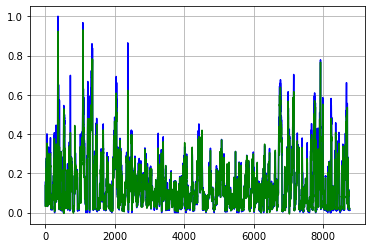

In [44]:
plt.plot(y_validation, 'b')
plt.plot(validation, 'g')
plt.grid(True)

# Test/validation with 1000 epochs

In [46]:
model.fit(x, y, epochs=1000, verbose=0)

In [50]:
prediction = model.predict(x_test)

In [51]:
print('Test:')
print(np.sqrt(mean_squared_error(y_test, prediction)).round(5))

Test:
0.02186


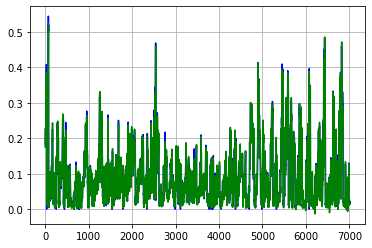

In [52]:
plt.plot(y_test.reset_index(drop=True), 'b')
plt.plot(prediction, 'g')
plt.grid(True)

In [53]:
validation = model.predict(x_validation)

In [54]:
print('Validation:')
print(np.sqrt(mean_squared_error(y_validation, validation)).round(5))

Validation:
0.04583


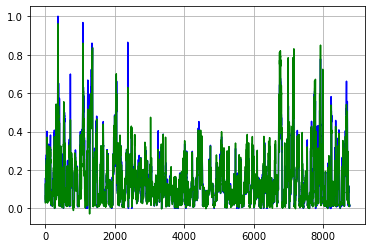

In [55]:
plt.plot(y_validation, 'b')
plt.plot(validation, 'g')
plt.grid(True)

# lag = 5

In [56]:
data_train_framed = series_to_supervised(data=data_train_framed, out_lag=5)
data_train_framed.head(5)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var1(t),...,var9(t+3),var1(t+4),var2(t+4),var3(t+4),var4(t+4),var5(t+4),var6(t+4),var7(t+4),var8(t+4),var9(t+4)
2,0.129779,0.278689,0.250000,0.527273,0.666667,0.002290,0.000000,0.0,0.148893,0.148893,...,0.109658,0.109658,0.426230,0.216667,0.563636,0.666667,0.011433,0.111111,0.0,0.105634
3,0.148893,0.295082,0.250000,0.527273,0.666667,0.003811,0.000000,0.0,0.159960,0.159960,...,0.105634,0.105634,0.426230,0.216667,0.581818,0.666667,0.014492,0.148148,0.0,0.124748
4,0.159960,0.360656,0.233333,0.545455,0.666667,0.005332,0.000000,0.0,0.182093,0.182093,...,0.124748,0.124748,0.426230,0.233333,0.600000,0.666667,0.017551,0.000000,0.0,0.120724
5,0.182093,0.426230,0.233333,0.563636,0.666667,0.008391,0.037037,0.0,0.138833,0.138833,...,0.120724,0.120724,0.409836,0.216667,0.600000,0.666667,0.020610,0.000000,0.0,0.132797
6,0.138833,0.426230,0.233333,0.563636,0.666667,0.009912,0.074074,0.0,0.109658,0.109658,...,0.132797,0.132797,0.426230,0.233333,0.618182,0.666667,0.023669,0.000000,0.0,0.140845


In [57]:
print(len(data_train_framed.columns))

54


In [59]:
data_train_framed.drop(data_train_framed.columns[[
    8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
    25,26,27,28,29,30,31,32,33,34,35,36,
    37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
]], axis=1, inplace=True)

In [61]:
data_train_framed.head(7)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t+4)
2,0.129779,0.278689,0.250000,0.527273,0.666667,0.002290,0.000000,0.0,0.105634
3,0.148893,0.295082,0.250000,0.527273,0.666667,0.003811,0.000000,0.0,0.124748
4,0.159960,0.360656,0.233333,0.545455,0.666667,0.005332,0.000000,0.0,0.120724
5,0.182093,0.426230,0.233333,0.563636,0.666667,0.008391,0.037037,0.0,0.132797
6,0.138833,0.426230,0.233333,0.563636,0.666667,0.009912,0.074074,0.0,0.140845
7,0.109658,0.426230,0.216667,0.563636,0.666667,0.011433,0.111111,0.0,0.152918
8,0.105634,0.426230,0.216667,0.581818,0.666667,0.014492,0.148148,0.0,0.148893


In [63]:
x = data_train_framed.loc[:,[
    'var1(t-1)',
    'var2(t-1)',
    'var3(t-1)',
    'var4(t-1)',
    'var5(t-1)',
    'var6(t-1)',
    'var7(t-1)',
    'var8(t-1)'
]]

y = data_train_framed.loc[:,['var9(t+4)']]

In [64]:
x_train, x_test, y_train, y_test = split_data(x, y, train_size=0.8)

In [65]:
x = np.expand_dims(x, axis=2)
x_test = np.expand_dims(x_test, axis=2)

# Test/validation with 100 epochs

In [66]:
model.fit(x, y, epochs=100, verbose=0)

In [67]:
prediction = model.predict(x_test)

In [68]:
print('Test:')
print(np.sqrt(mean_squared_error(y_test, prediction)).round(5))

Test:
0.04883


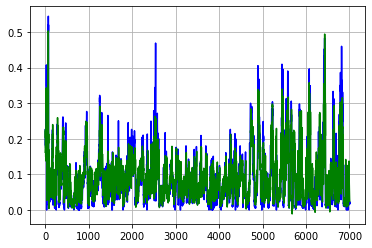

In [69]:
plt.plot(y_test.reset_index(drop=True), 'b')
plt.plot(prediction, 'g')
plt.grid(True)

In [70]:
validation = model.predict(x_validation)

In [71]:
print('Validation:')
print(np.sqrt(mean_squared_error(y_validation, validation)).round(5))

Validation:
0.08926


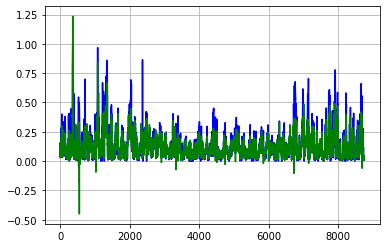

In [72]:
plt.plot(y_validation, 'b')
plt.plot(validation, 'g')
plt.grid(True)

# Test/validation with 500 epochs

In [73]:
model.fit(x, y, epochs=500, verbose=0)

In [74]:
prediction = model.predict(x_test)

In [75]:
print('Test:')
print(np.sqrt(mean_squared_error(y_test, prediction)).round(5))

Test:
0.04798


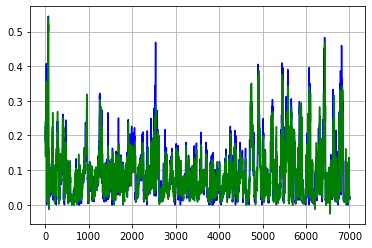

In [76]:
plt.plot(y_test.reset_index(drop=True), 'b')
plt.plot(prediction, 'g')
plt.grid(True)

In [77]:
validation = model.predict(x_validation)

In [78]:
print('Validation:')
print(np.sqrt(mean_squared_error(y_validation, validation)).round(5))

Validation:
0.10463


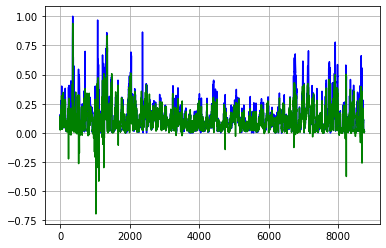

In [79]:
plt.plot(y_validation, 'b')
plt.plot(validation, 'g')
plt.grid(True)

# Test/validation with 1000 epochs

In [80]:
model.fit(x, y, epochs=1000, verbose=0)

In [81]:
prediction = model.predict(x_test)

In [82]:
print('Test:')
print(np.sqrt(mean_squared_error(y_test, prediction)).round(5))

Test:
0.04774


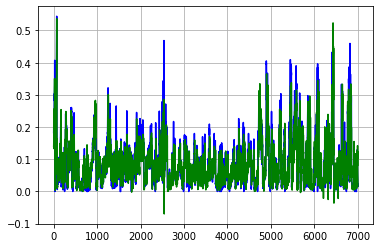

In [83]:
plt.plot(y_test.reset_index(drop=True), 'b')
plt.plot(prediction, 'g')
plt.grid(True)

In [84]:
validation = model.predict(x_validation)

In [85]:
print('Validation:')
print(np.sqrt(mean_squared_error(y_validation, validation)).round(5))

Validation:
0.13069


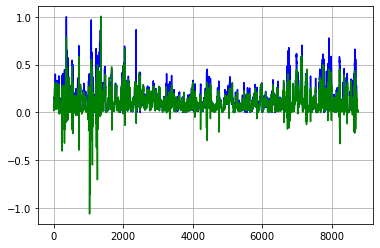

In [86]:
plt.plot(y_validation, 'b')
plt.plot(validation, 'g')
plt.grid(True)

# Lag 10

In [87]:
data_train_framed = series_to_supervised(data=data_train_framed, out_lag=10)
data_train_framed.head(5)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var1(t),...,var9(t+8),var1(t+9),var2(t+9),var3(t+9),var4(t+9),var5(t+9),var6(t+9),var7(t+9),var8(t+9),var9(t+9)
3,0.129779,0.278689,0.250000,0.527273,0.666667,0.002290,0.000000,0.0,0.105634,0.148893,...,0.154930,0.140845,0.426230,0.233333,0.636364,0.666667,0.029018,0.037037,0.0,0.159960
4,0.148893,0.295082,0.250000,0.527273,0.666667,0.003811,0.000000,0.0,0.124748,0.159960,...,0.159960,0.152918,0.409836,0.233333,0.636364,0.666667,0.034367,0.000000,0.0,0.164990
5,0.159960,0.360656,0.233333,0.545455,0.666667,0.005332,0.000000,0.0,0.120724,0.182093,...,0.164990,0.148893,0.409836,0.233333,0.636364,0.666667,0.039716,0.000000,0.0,0.171026
6,0.182093,0.426230,0.233333,0.563636,0.666667,0.008391,0.037037,0.0,0.132797,0.138833,...,0.171026,0.164990,0.409836,0.233333,0.618182,0.666667,0.046586,0.000000,0.0,0.149899
7,0.138833,0.426230,0.233333,0.563636,0.666667,0.009912,0.074074,0.0,0.140845,0.109658,...,0.149899,0.158954,0.393443,0.233333,0.618182,0.666667,0.053456,0.000000,0.0,0.154930


In [88]:
data_train_framed.drop(data_train_framed.columns[[
    8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,
    38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,
    68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97
]], axis=1, inplace=True)

data_train_framed.head(5)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t+9)
3,0.129779,0.278689,0.250000,0.527273,0.666667,0.002290,0.000000,0.0,0.159960
4,0.148893,0.295082,0.250000,0.527273,0.666667,0.003811,0.000000,0.0,0.164990
5,0.159960,0.360656,0.233333,0.545455,0.666667,0.005332,0.000000,0.0,0.171026
6,0.182093,0.426230,0.233333,0.563636,0.666667,0.008391,0.037037,0.0,0.149899
7,0.138833,0.426230,0.233333,0.563636,0.666667,0.009912,0.074074,0.0,0.154930


In [89]:
x = data_train_framed.loc[:,[
    'var1(t-1)',
    'var2(t-1)',
    'var3(t-1)',
    'var4(t-1)',
    'var5(t-1)',
    'var6(t-1)',
    'var7(t-1)',
    'var8(t-1)'
]]

y = data_train_framed.loc[:,['var9(t+9)']]

In [90]:
x_train, x_test, y_train, y_test = split_data(x, y, train_size=0.8)

In [91]:
x = np.expand_dims(x, axis=2)
x_test = np.expand_dims(x_test, axis=2)

# Test/validation with 100 epochs

In [92]:
model.fit(x, y, epochs=100, verbose=0)

In [93]:
prediction = model.predict(x_test)

In [94]:
print('Test:')
print(np.sqrt(mean_squared_error(y_test, prediction)).round(5))

Test:
0.06598


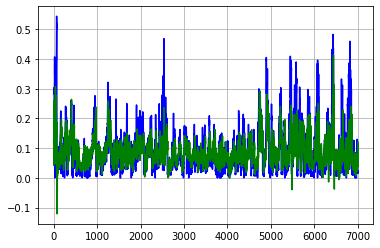

In [95]:
plt.plot(y_test.reset_index(drop=True), 'b')
plt.plot(prediction, 'g')
plt.grid(True)

In [96]:
validation = model.predict(x_validation)

In [97]:
print('Validation:')
print(np.sqrt(mean_squared_error(y_validation, validation)).round(5))

Validation:
0.12832


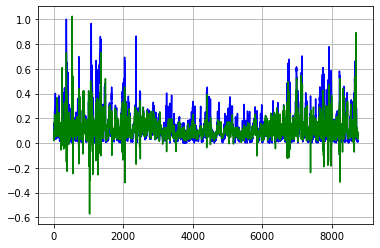

In [98]:
plt.plot(y_validation, 'b')
plt.plot(validation, 'g')
plt.grid(True)

# Test/validation with 500 epochs

In [99]:
model.fit(x, y, epochs=500, verbose=0)

In [100]:
prediction = model.predict(x_test)

In [101]:
print('Test:')
print(np.sqrt(mean_squared_error(y_test, prediction)).round(5))

Test:
0.06487


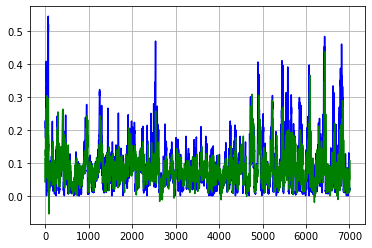

In [102]:
plt.plot(y_test.reset_index(drop=True), 'b')
plt.plot(prediction, 'g')
plt.grid(True)

In [103]:
validation = model.predict(x_validation)

In [104]:
print('Validation:')
print(np.sqrt(mean_squared_error(y_validation, validation)).round(5))

Validation:
0.14876


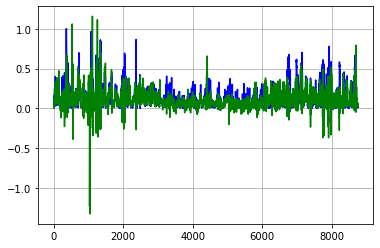

In [105]:
plt.plot(y_validation, 'b')
plt.plot(validation, 'g')
plt.grid(True)

# Test/validation with 1000 epochs

In [106]:
model.fit(x, y, epochs=1000, verbose=0)

In [107]:
prediction = model.predict(x_test)

In [108]:
print('Test:')
print(np.sqrt(mean_squared_error(y_test, prediction)).round(5))

Test:
0.06431


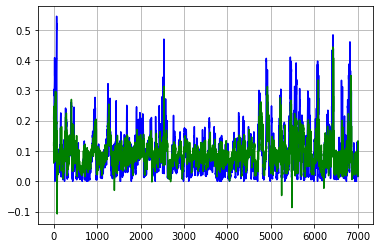

In [109]:
plt.plot(y_test.reset_index(drop=True), 'b')
plt.plot(prediction, 'g')
plt.grid(True)

In [110]:
validation = model.predict(x_validation)

In [111]:
print('Validation:')
print(np.sqrt(mean_squared_error(y_validation, validation)).round(5))

Validation:
0.16879


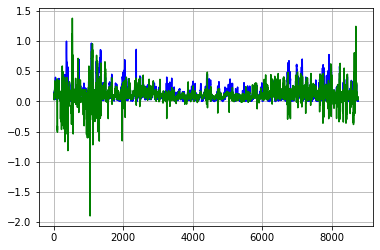

In [112]:
plt.plot(y_validation, 'b')
plt.plot(validation, 'g')
plt.grid(True)